In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
apartments = [f"Apt_{i}" for i in range(1, 21)]
print(apartments)

['Apt_1', 'Apt_2', 'Apt_3', 'Apt_4', 'Apt_5', 'Apt_6', 'Apt_7', 'Apt_8', 'Apt_9', 'Apt_10', 'Apt_11', 'Apt_12', 'Apt_13', 'Apt_14', 'Apt_15', 'Apt_16', 'Apt_17', 'Apt_18', 'Apt_19', 'Apt_20']


In [4]:
dates = pd.date_range(start="2025-07-01", periods=30, freq="D")
print(dates)


DatetimeIndex(['2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-05', '2025-07-06', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-12',
               '2025-07-13', '2025-07-14', '2025-07-15', '2025-07-16',
               '2025-07-17', '2025-07-18', '2025-07-19', '2025-07-20',
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', freq='D')


In [5]:
data={
      "Date":np.tile(dates,len(apartments)),
      "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage": np.random.normal(loc=20, scale=5, size=len(dates) * len(apartments))
}
df=pd.DataFrame(data)
print(df)

          Date Apartment  Electricity_usage
0   2025-07-01     Apt_1          22.483571
1   2025-07-02     Apt_1          19.308678
2   2025-07-03     Apt_1          23.238443
3   2025-07-04     Apt_1          27.615149
4   2025-07-05     Apt_1          18.829233
..         ...       ...                ...
595 2025-07-26    Apt_20          17.449918
596 2025-07-27    Apt_20          18.650625
597 2025-07-28    Apt_20          15.106181
598 2025-07-29    Apt_20          17.778534
599 2025-07-30    Apt_20          21.886502

[600 rows x 3 columns]


In [6]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)
print(df["Electricity_usage"])

0      22.48
1      19.31
2      23.24
3      27.62
4      18.83
       ...  
595    17.45
596    18.65
597    15.11
598    17.78
599    21.89
Name: Electricity_usage, Length: 600, dtype: float64


In [7]:
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64
                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071
Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [8]:
usage_per_apartment= df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Apartment
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64
Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

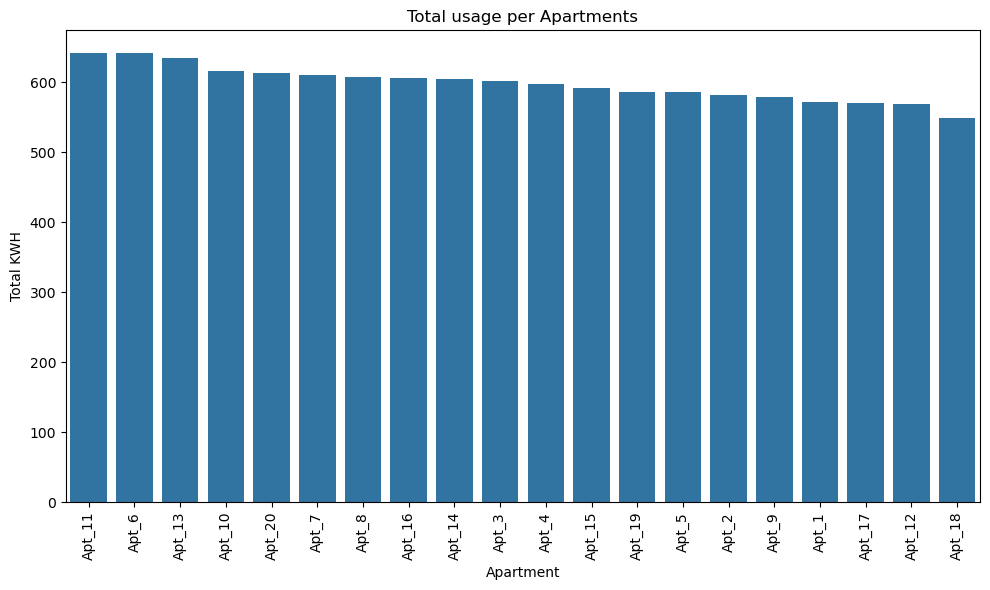

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

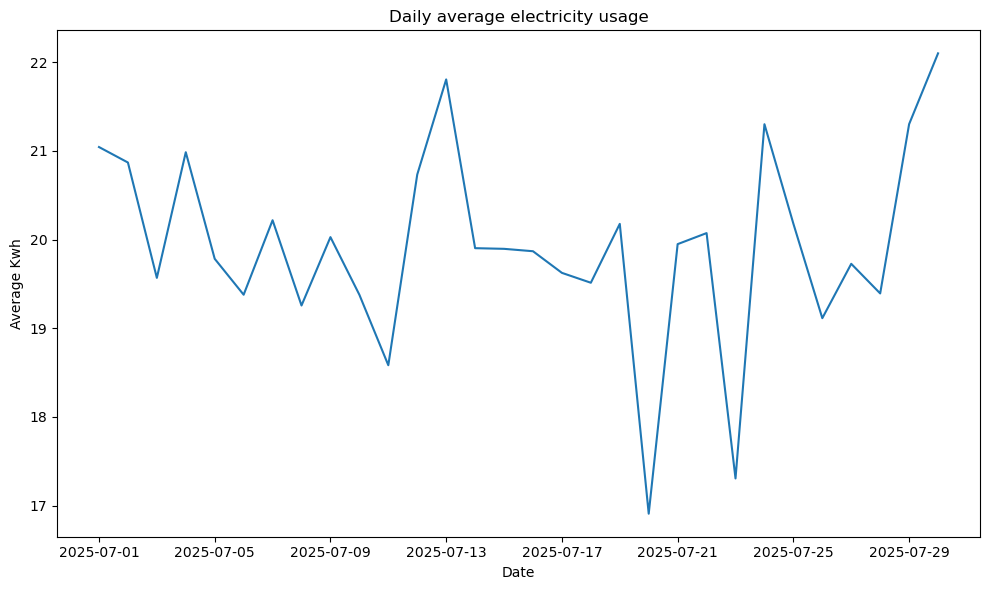

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average Kwh")
plt.tight_layout()
plt.show()

In [12]:

threshold= df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"] > threshold
print(df[df["High_Usage_flag"]== True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24     Apt_4              32.32             True
125 2025-07-06     Apt_5              30.95             True
179 2025-07-30     Apt_6              33.60             True
209 2025-07-30     Apt_7              39.26             True
220 2025-07-11     Apt_8              31.57             True
